In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [3]:
bitcoin=pd.read_csv('/content/coin_Bitcoin.csv')
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [4]:
bitcoin.shape

(2991, 10)

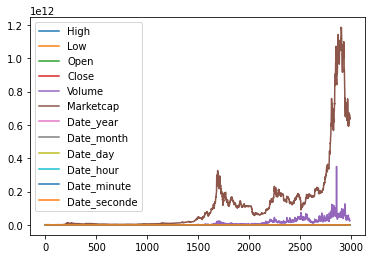

In [19]:
bitcoin.plot()

In [5]:
bitcoin.Symbol.unique()

array(['BTC'], dtype=object)

In [6]:
bitcoin.drop(["Name"],axis=1, inplace=True)
bitcoin.drop(["SNo"],axis=1, inplace=True)
bitcoin.drop(["Symbol"],axis=1, inplace=True)

In [7]:
bitcoin.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap'], dtype='object')

In [8]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2991 non-null   object 
 1   High       2991 non-null   float64
 2   Low        2991 non-null   float64
 3   Open       2991 non-null   float64
 4   Close      2991 non-null   float64
 5   Volume     2991 non-null   float64
 6   Marketcap  2991 non-null   float64
dtypes: float64(6), object(1)
memory usage: 163.7+ KB


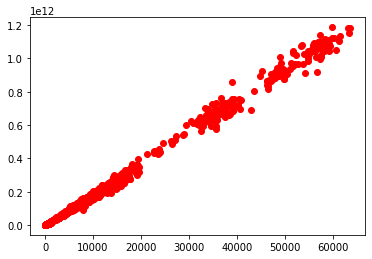

In [34]:
x=bitcoin['Open']
y=bitcoin['Marketcap']
plt.scatter(x,y,color='red')

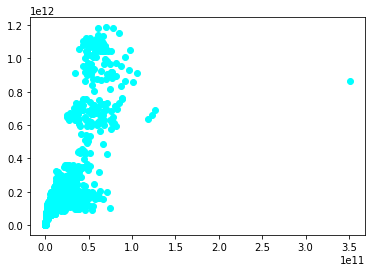

In [36]:
x=bitcoin['Volume']
y=bitcoin['Marketcap']
plt.scatter(x,y,color='cyan')

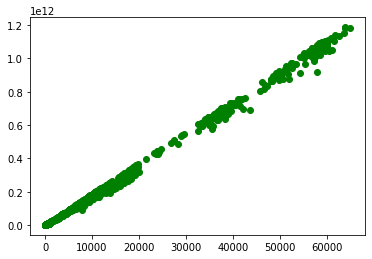

In [37]:
x=bitcoin['High']
y=bitcoin['Marketcap']
plt.scatter(x,y,color='green')

In [9]:
bitcoin.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [10]:
import datetime as dt
bitcoin["Date"]=pd.to_datetime(bitcoin["Date"])
bitcoin['Date_year'] = bitcoin["Date"].dt.year
bitcoin['Date_month'] = bitcoin["Date"].dt.month
bitcoin['Date_day'] = bitcoin["Date"].dt.day
bitcoin['Date_hour'] = bitcoin["Date"].dt.hour
bitcoin['Date_minute'] = bitcoin["Date"].dt.minute
bitcoin['Date_seconde'] = bitcoin["Date"].dt.second
bitcoin.drop(["Date"], axis=1, inplace=True)
bitcoin.head()

,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,4,29,23,59,59
1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,4,30,23,59,59
2,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,5,1,23,59,59
3,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,5,2,23,59,59
4,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,5,3,23,59,59


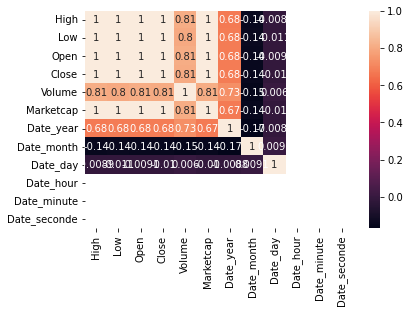

In [22]:
sns.heatmap(bitcoin.corr(), annot = True)

In [11]:
X=bitcoin.drop(["Marketcap"], axis=1)
Y=bitcoin["Marketcap"]
X.head()

,High,Low,Open,Close,Volume,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_seconde
0,147.488007,134.000000,134.444000,144.539993,0.0,2013,4,29,23,59,59
1,146.929993,134.050003,144.000000,139.000000,0.0,2013,4,30,23,59,59
2,139.889999,107.720001,139.000000,116.989998,0.0,2013,5,1,23,59,59
3,125.599998,92.281898,116.379997,105.209999,0.0,2013,5,2,23,59,59
4,108.127998,79.099998,106.250000,97.750000,0.0,2013,5,3,23,59,59


Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [24]:
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)



In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypred)

2991046363.1174216

In [15]:
LR.score(xtest,ytest)

0.9994141897222906

Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(xtrain,ytrain)
ypred=Ls.predict(xtest)

Ls.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.447e+22, tolerance: 1.096e+22
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.9992782274568394

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypred)

3271154472.445984

Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor(max_depth=1)
mytre.fit(xtrain,ytrain)
ypredd=mytre.predict(xtest)
mytre.score(xtest,ytest)

0.7965644733090571